In [1]:
# Importing requests to extract content from a url
import requests
# Beautifulsoup is for web scrapping...used to scrap specific content
from bs4 import BeautifulSoup as bs  
import re 

In [2]:
iphone_snapdeal=[]
url1= "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2= "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
    ip= []  
    base_url= url1+str(i)+url2
    response= requests.get(base_url)
    soup= bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    temp= soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
    for j in range(len(temp)):
        ip.append(temp[j].find("p").text)
        iphone_snapdeal= iphone_snapdeal+ip

In [3]:
## Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [4]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [5]:
iphone_snapdeal

["D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can't say dis is d phone's problem at all. I hv chosen d 8gb phone so it's my flaw. But in 1 word i just can say it is d best phone in dis price. Thumbs up APPLE",
 'I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also',
 'Good Price. Great Seller. Genuine Product. Fast Shipping. Recommended*****',
 'I am really happy with product',
 'Good product. Worth buying. Nice phone. Timely delivery by snap deal',
 'The product quality is good but the only thing is memory capacity is not sufficient for storing the data',
 'it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in per

Importing libraries

In [6]:
#!pip install textblob

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

importing data

In [8]:
ip_snapd= pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,"[""D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can't say dis is d phone's problem at all. I hv chosen d 8gb phone so it's my flaw. But in 1 word i just can say it is d best phone in dis price. Thumbs up APPLE""",'I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also','Good Price. Great Seller. Genuine Product. Fast Shipping. Recommended*****','I am really happy with product','Good product. Worth buying. Nice phone. Timely delivery by snap deal','The product quality is good but the only thing is memory capacity is not sufficient for storing the data','it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.\nno lagging till today\nsuitable for your business need.','THE PROMPTNESS IN DELIVERY AND THE PRODUCT RECEIVED IS \n\nGOOD AND I AM SATISFIED','I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted','This a great experience to have a iphone,...,'I am very much happy with my product thanks to SNEPDEAL.','Awesome iphone in this price range.\ni would recommend this phone','The 5C was delivered in a sealed box - crisp and brand new ! super deal.','I M Happy With iphone5c and snapdeal services. i would recommended Snapdeal service my near & dear','Good Mobile but its memory will be filled faster its just 8GB limit',"""It's really 100% worth to buy this product. I am fully satisfied with this product.""",'Good product and packing was also good only issue with courier service..they took more then 10 days to deliver .','Mobile was got no hang smooth touch performing well',"""It's been close to 5 months since I bought this product and till now","I am happy with how the product has performed.""]"


In [9]:
ip_snapd= ' '.join(ip_snapd)
ip_snapd

'["D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can\'t say dis is d phone\'s problem at all. I hv chosen d 8gb phone so it\'s my flaw. But in 1 word i just can say it is d best phone in dis price. Thumbs up APPLE"  \'I got my iPhone 5c white colour in good condition and best rate \\nsnapdeal rate is always lowest then other sites and store also\'  \'Good Price. Great Seller. Genuine Product. Fast Shipping. Recommended*****\'  \'I am really happy with product\'  \'Good product. Worth buying. Nice phone. Timely delivery by snap deal\'  \'The product quality is good but the only thing is memory capacity is not sufficient for storing the data\'  \'it is simple \\nall the thing that u need it having it \\nI have buy it 2 year before from snapdeal and still 

In [10]:
# Remove Punctuations 
no_punc_text= ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'D phone is good IOS is d best OS Safe also D phone looks great though it consists plastic body Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks Its camera is superb Battery also Dere is only one problem nd dat is space Bt I cant say dis is d phones problem at all I hv chosen d 8gb phone so its my flaw But in 1 word i just can say it is d best phone in dis price Thumbs up APPLE  I got my iPhone 5c white colour in good condition and best rate nsnapdeal rate is always lowest then other sites and store also  Good Price Great Seller Genuine Product Fast Shipping Recommended  I am really happy with product  Good product Worth buying Nice phone Timely delivery by snap deal  The product quality is good but the only thing is memory capacity is not sufficient for storing the data  it is simple nall the thing that u need it having it nI have buy it 2 year before from snapdeal and still it is in perfect conditionnno lagging till todaynsuitable for you

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Siddhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# remove https or url within text
no_url_text= re.sub(r'http\S+', '', no_punc_text)
no_url_text

'D phone is good IOS is d best OS Safe also D phone looks great though it consists plastic body Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks Its camera is superb Battery also Dere is only one problem nd dat is space Bt I cant say dis is d phones problem at all I hv chosen d 8gb phone so its my flaw But in 1 word i just can say it is d best phone in dis price Thumbs up APPLE  I got my iPhone 5c white colour in good condition and best rate nsnapdeal rate is always lowest then other sites and store also  Good Price Great Seller Genuine Product Fast Shipping Recommended  I am really happy with product  Good product Worth buying Nice phone Timely delivery by snap deal  The product quality is good but the only thing is memory capacity is not sufficient for storing the data  it is simple nall the thing that u need it having it nI have buy it 2 year before from snapdeal and still it is in perfect conditionnno lagging till todaynsuitable for you

In [13]:
text_tokens= word_tokenize(no_url_text)
print(text_tokens)

['D', 'phone', 'is', 'good', 'IOS', 'is', 'd', 'best', 'OS', 'Safe', 'also', 'D', 'phone', 'looks', 'great', 'though', 'it', 'consists', 'plastic', 'body', 'Metal', 'body', 'looks', 'good', 'bt', 'dt', 'nt', 'means', 'plastic', 'body', 'looks', 'cheap', 'plastic', 'may', 'also', 'b', 'nice', 'in', 'looks', 'Its', 'camera', 'is', 'superb', 'Battery', 'also', 'Dere', 'is', 'only', 'one', 'problem', 'nd', 'dat', 'is', 'space', 'Bt', 'I', 'cant', 'say', 'dis', 'is', 'd', 'phones', 'problem', 'at', 'all', 'I', 'hv', 'chosen', 'd', '8gb', 'phone', 'so', 'its', 'my', 'flaw', 'But', 'in', '1', 'word', 'i', 'just', 'can', 'say', 'it', 'is', 'd', 'best', 'phone', 'in', 'dis', 'price', 'Thumbs', 'up', 'APPLE', 'I', 'got', 'my', 'iPhone', '5c', 'white', 'colour', 'in', 'good', 'condition', 'and', 'best', 'rate', 'nsnapdeal', 'rate', 'is', 'always', 'lowest', 'then', 'other', 'sites', 'and', 'store', 'also', 'Good', 'Price', 'Great', 'Seller', 'Genuine', 'Product', 'Fast', 'Shipping', 'Recommended'

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Siddhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Tokens count
len(text_tokens)

1573

In [16]:
# Remove Stopwords
my_stop_words= stopwords.words('english')

sw_list= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens= [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['D', 'phone', 'good', 'IOS', 'best', 'OS', 'Safe', 'also', 'D', 'phone', 'looks', 'great', 'though', 'consists', 'plastic', 'body', 'Metal', 'body', 'looks', 'good', 'bt', 'dt', 'nt', 'means', 'plastic', 'body', 'looks', 'cheap', 'plastic', 'may', 'also', 'b', 'nice', 'looks', 'Its', 'camera', 'superb', 'Battery', 'also', 'Dere', 'one', 'problem', 'nd', 'dat', 'space', 'Bt', 'cant', 'say', 'dis', 'phones', 'problem', 'hv', 'chosen', '8gb', 'phone', 'flaw', 'But', '1', 'word', 'say', 'best', 'phone', 'dis', 'price', 'Thumbs', 'APPLE', 'got', 'iPhone', '5c', 'white', 'colour', 'good', 'condition', 'best', 'rate', 'nsnapdeal', 'rate', 'always', 'lowest', 'sites', 'store', 'also', 'Good', 'Price', 'Great', 'Seller', 'Genuine', 'Product', 'Fast', 'Shipping', 'Recommended', 'really', 'happy', 'product', 'Good', 'product', 'Worth', 'buying', 'Nice', 'phone', 'Timely', 'delivery', 'snap', 'deal', 'The', 'product', 'quality', 'good', 'thing', 'memory', 'capacity', 'sufficient', 'storing', 'dat

In [17]:
# Normalize the data
lower_words= [Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['timely', 'delivery', 'snap', 'deal', 'the', 'product', 'quality', 'good', 'thing', 'memory', 'capacity', 'sufficient', 'storing', 'data', 'simple', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'business', 'need', 'the', 'promptness', 'in', 'delivery', 'and', 'the', 'product', 'received', 'is', 'nngood', 'and', 'am', 'satisfied', 'happy', 'iphone', 'ordering', 'phone', 'little', 'doubt', 'but', 'receiving', 'phone', 'really', 'happyalso', 'found', 'original', 'iphoneearlier', 'doubted', 'this', 'great', 'experience', 'iphone', 'snapdeal', 'delivery', 'expectation', 'genuine', 'product', 'delivered', 'within', 'scheduled', 'timframe', 'thanks', 'snapdeal', 'superb', 'model', 'snapdeal', 'delivered', 'promised', 'time', 'have', 'switched', 'android', 'apple', 'pretty', 'satisfied', 'iphone', '5c', 'excellent', 'camera', 'crisp', 'display', 'the', 'battery', 'issue', 'solved', 'latest', 'ios9'

In [18]:
# Stemming (Optional)
ps= PorterStemmer()
stemmed_tokens= [ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['time', 'deliveri', 'snap', 'deal', 'the', 'product', 'qualiti', 'good', 'thing', 'memori', 'capac', 'suffici', 'store', 'data', 'simpl', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lag', 'till', 'todaynsuit', 'busi', 'need', 'the', 'prompt', 'in', 'deliveri', 'and', 'the', 'product', 'receiv', 'is', 'nngood', 'and', 'am', 'satisfi', 'happi', 'iphon', 'order', 'phone', 'littl', 'doubt', 'but', 'receiv', 'phone', 'realli', 'happyalso', 'found', 'origin', 'iphoneearli', 'doubt', 'thi', 'great', 'experi', 'iphon', 'snapdeal', 'deliveri', 'expect', 'genuin', 'product', 'deliv', 'within', 'schedul', 'timfram', 'thank', 'snapdeal', 'superb', 'model', 'snapdeal', 'deliv', 'promis', 'time', 'have', 'switch', 'android', 'appl', 'pretti', 'satisfi', 'iphon', '5c', 'excel', 'camera', 'crisp', 'display', 'the', 'batteri', 'issu', 'solv', 'latest', 'ios9', 'updat']


In [19]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp= spacy.load('en_core_web_sm')
doc= nlp(' '.join(lower_words))
print(doc)

d phone good ios best os safe also d phone looks great though consists plastic body metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice looks its camera superb battery also dere one problem nd dat space bt cant say dis phones problem hv chosen 8gb phone flaw but 1 word say best phone dis price thumbs apple got iphone 5c white colour good condition best rate nsnapdeal rate always lowest sites store also good price great seller genuine product fast shipping recommended really happy product good product worth buying nice phone timely delivery snap deal the product quality good thing memory capacity sufficient storing data simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable business need the promptness in delivery and the product received is nngood and am satisfied happy iphone ordering phone little doubt but receiving phone really happyalso found original iphoneearlier doubted this great experience iphone

In [20]:
lemmas= [token.lemma_ for token in doc]
print(lemmas)

['d', 'phone', 'good', 'io', 'good', 'os', 'safe', 'also', 'd', 'phone', 'look', 'great', 'though', 'consist', 'plastic', 'body', 'metal', 'body', 'look', 'good', 'bt', 'dt', 'not', 'mean', 'plastic', 'body', 'look', 'cheap', 'plastic', 'may', 'also', 'b', 'nice', 'look', 'its', 'camera', 'superb', 'battery', 'also', 'dere', 'one', 'problem', 'nd', 'dat', 'space', 'bt', 'can', 'not', 'say', 'dis', 'phone', 'problem', 'hv', 'choose', '8', 'gb', 'phone', 'flaw', 'but', '1', 'word', 'say', 'good', 'phone', 'dis', 'price', 'thumb', 'apple', 'get', 'iphone', '5c', 'white', 'colour', 'good', 'condition', 'good', 'rate', 'nsnapdeal', 'rate', 'always', 'low', 'site', 'store', 'also', 'good', 'price', 'great', 'seller', 'genuine', 'product', 'fast', 'shipping', 'recommend', 'really', 'happy', 'product', 'good', 'product', 'worth', 'buy', 'nice', 'phone', 'timely', 'delivery', 'snap', 'deal', 'the', 'product', 'quality', 'good', 'thing', 'memory', 'capacity', 'sufficient', 'store', 'datum', 'sim

In [21]:
clean_comments= ' '.join(lemmas)
clean_comments

'd phone good io good os safe also d phone look great though consist plastic body metal body look good bt dt not mean plastic body look cheap plastic may also b nice look its camera superb battery also dere one problem nd dat space bt can not say dis phone problem hv choose 8 gb phone flaw but 1 word say good phone dis price thumb apple get iphone 5c white colour good condition good rate nsnapdeal rate always low site store also good price great seller genuine product fast shipping recommend really happy product good product worth buy nice phone timely delivery snap deal the product quality good thing memory capacity sufficient store datum simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable business need the promptness in delivery and the product receive be nngood and be satisfied happy iphone order phone little doubt but receive phone really happyalso find original iphoneearlier doubt this great experience iphone snapdeal delivery exp

In [22]:
# feature extraction
cv= CountVectorizer()
clean_commentscv= cv.fit_transform(lemmas)

In [23]:
print(cv.vocabulary_)

{'phone': 243, 'good': 142, 'io': 168, 'os': 232, 'safe': 295, 'also': 21, 'look': 190, 'great': 146, 'though': 363, 'consist': 75, 'plastic': 248, 'body': 45, 'metal': 203, 'bt': 49, 'dt': 107, 'not': 221, 'mean': 199, 'cheap': 62, 'may': 198, 'nice': 219, 'its': 178, 'camera': 55, 'superb': 345, 'battery': 38, 'dere': 98, 'one': 225, 'problem': 260, 'nd': 213, 'dat': 87, 'space': 337, 'can': 56, 'say': 301, 'dis': 99, 'hv': 162, 'choose': 64, 'gb': 137, 'flaw': 132, 'but': 53, 'word': 402, 'price': 254, 'thumb': 365, 'apple': 28, 'get': 139, 'iphone': 171, '5c': 7, 'white': 396, 'colour': 67, 'condition': 73, 'rate': 281, 'nsnapdeal': 222, 'always': 22, 'low': 193, 'site': 325, 'store': 342, 'seller': 308, 'genuine': 138, 'product': 262, 'fast': 123, 'shipping': 315, 'recommend': 289, 'really': 284, 'happy': 150, 'worth': 405, 'buy': 54, 'timely': 368, 'delivery': 96, 'snap': 330, 'deal': 91, 'the': 356, 'quality': 275, 'thing': 359, 'memory': 201, 'capacity': 57, 'sufficient': 343, 

In [24]:
print(cv.get_feature_names_out()[100:200])

['discount' 'dispatchnprosn1' 'display' 'do' 'doubt' 'doubtfull' 'dream'
 'dt' 'due' 'earn' 'easy' 'eliveryi' 'emi' 'essy' 'even' 'ever' 'everyone'
 'everything' 'excellent' 'expectation' 'experience' 'fake' 'family'
 'fast' 'feature' 'feel' 'file' 'fill' 'find' 'finger' 'first' 'five'
 'flaw' 'fraudulent' 'free' 'friend' 'fully' 'gb' 'genuine' 'get' 'gift'
 'go' 'good' 'goodbut' 'goood' 'grand' 'great' 'guess' 'hahahaha' 'hang'
 'happy' 'happyalso' 'have' 'headphone' 'hear' 'heated' 'heavy' 'hesitate'
 'honest' 'honestly' 'hour' 'however' 'hv' 'in' 'initially' 'inter'
 'interaction' 'interest' 'io' 'ios' 'ios9' 'iphone' 'iphone5c'
 'iphoneearlier' 'issue' 'it' 'item' 'itnniphone' 'its' 'job' 'lack' 'lag'
 'lagging' 'late' 'leave' 'level' 'like' 'limit' 'listnnapple' 'little'
 'look' 'love' 'lovely' 'low' 'make' 'manufacturer' 'mark' 'marvallous'
 'may' 'mean']


In [25]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
print(clean_commentscv.toarray().shape)

(1028, 410)


n-gram

In [27]:
cv_ngram_range= CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram= cv_ngram_range.fit_transform(lemmas)

In [28]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['100' '5c' 'also' 'amazing' 'and' 'android' 'apple' 'awesome' 'be' 'body'
 'box' 'budget' 'but' 'buy' 'camera' 'cheap' 'condition' 'day' 'deal'
 'deliver' 'delivery' 'do' 'even' 'excellent' 'experience' 'fast' 'feel'
 'file' 'fill' 'first' 'gb' 'genuine' 'get' 'go' 'good' 'great' 'hang'
 'happy' 'have' 'io' 'iphone' 'issue' 'it' 'its' 'late' 'like' 'look'
 'low' 'memory' 'mobile' 'need' 'new' 'nice' 'not' 'offer' 'one' 'order'
 'original' 'os' 'overall' 'pack' 'perfect' 'phone' 'plastic' 'price'
 'problem' 'product' 'quality' 'really' 'receive' 'recommend' 'review'
 'satisfactory' 'satisfied' 'seller' 'service' 'shipping' 'site' 'snap'
 'snapdeal' 'so' 'space' 'superb' 'take' 'thank' 'the' 'thing' 'think'
 'this' 'though' 'till' 'time' 'use' 'very' 'want' 'well' 'within' 'worth'
 'would' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
# tfidf vectorizer
tfidfv_ngram_max_features= TfidfVectorizer(norm= 'l2',analyzer= 'word',ngram_range= (1,3),max_features= 500)
tfidf_matix_ngram= tfidfv_ngram_max_features.fit_transform(lemmas)

Generate wordcloud

In [30]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

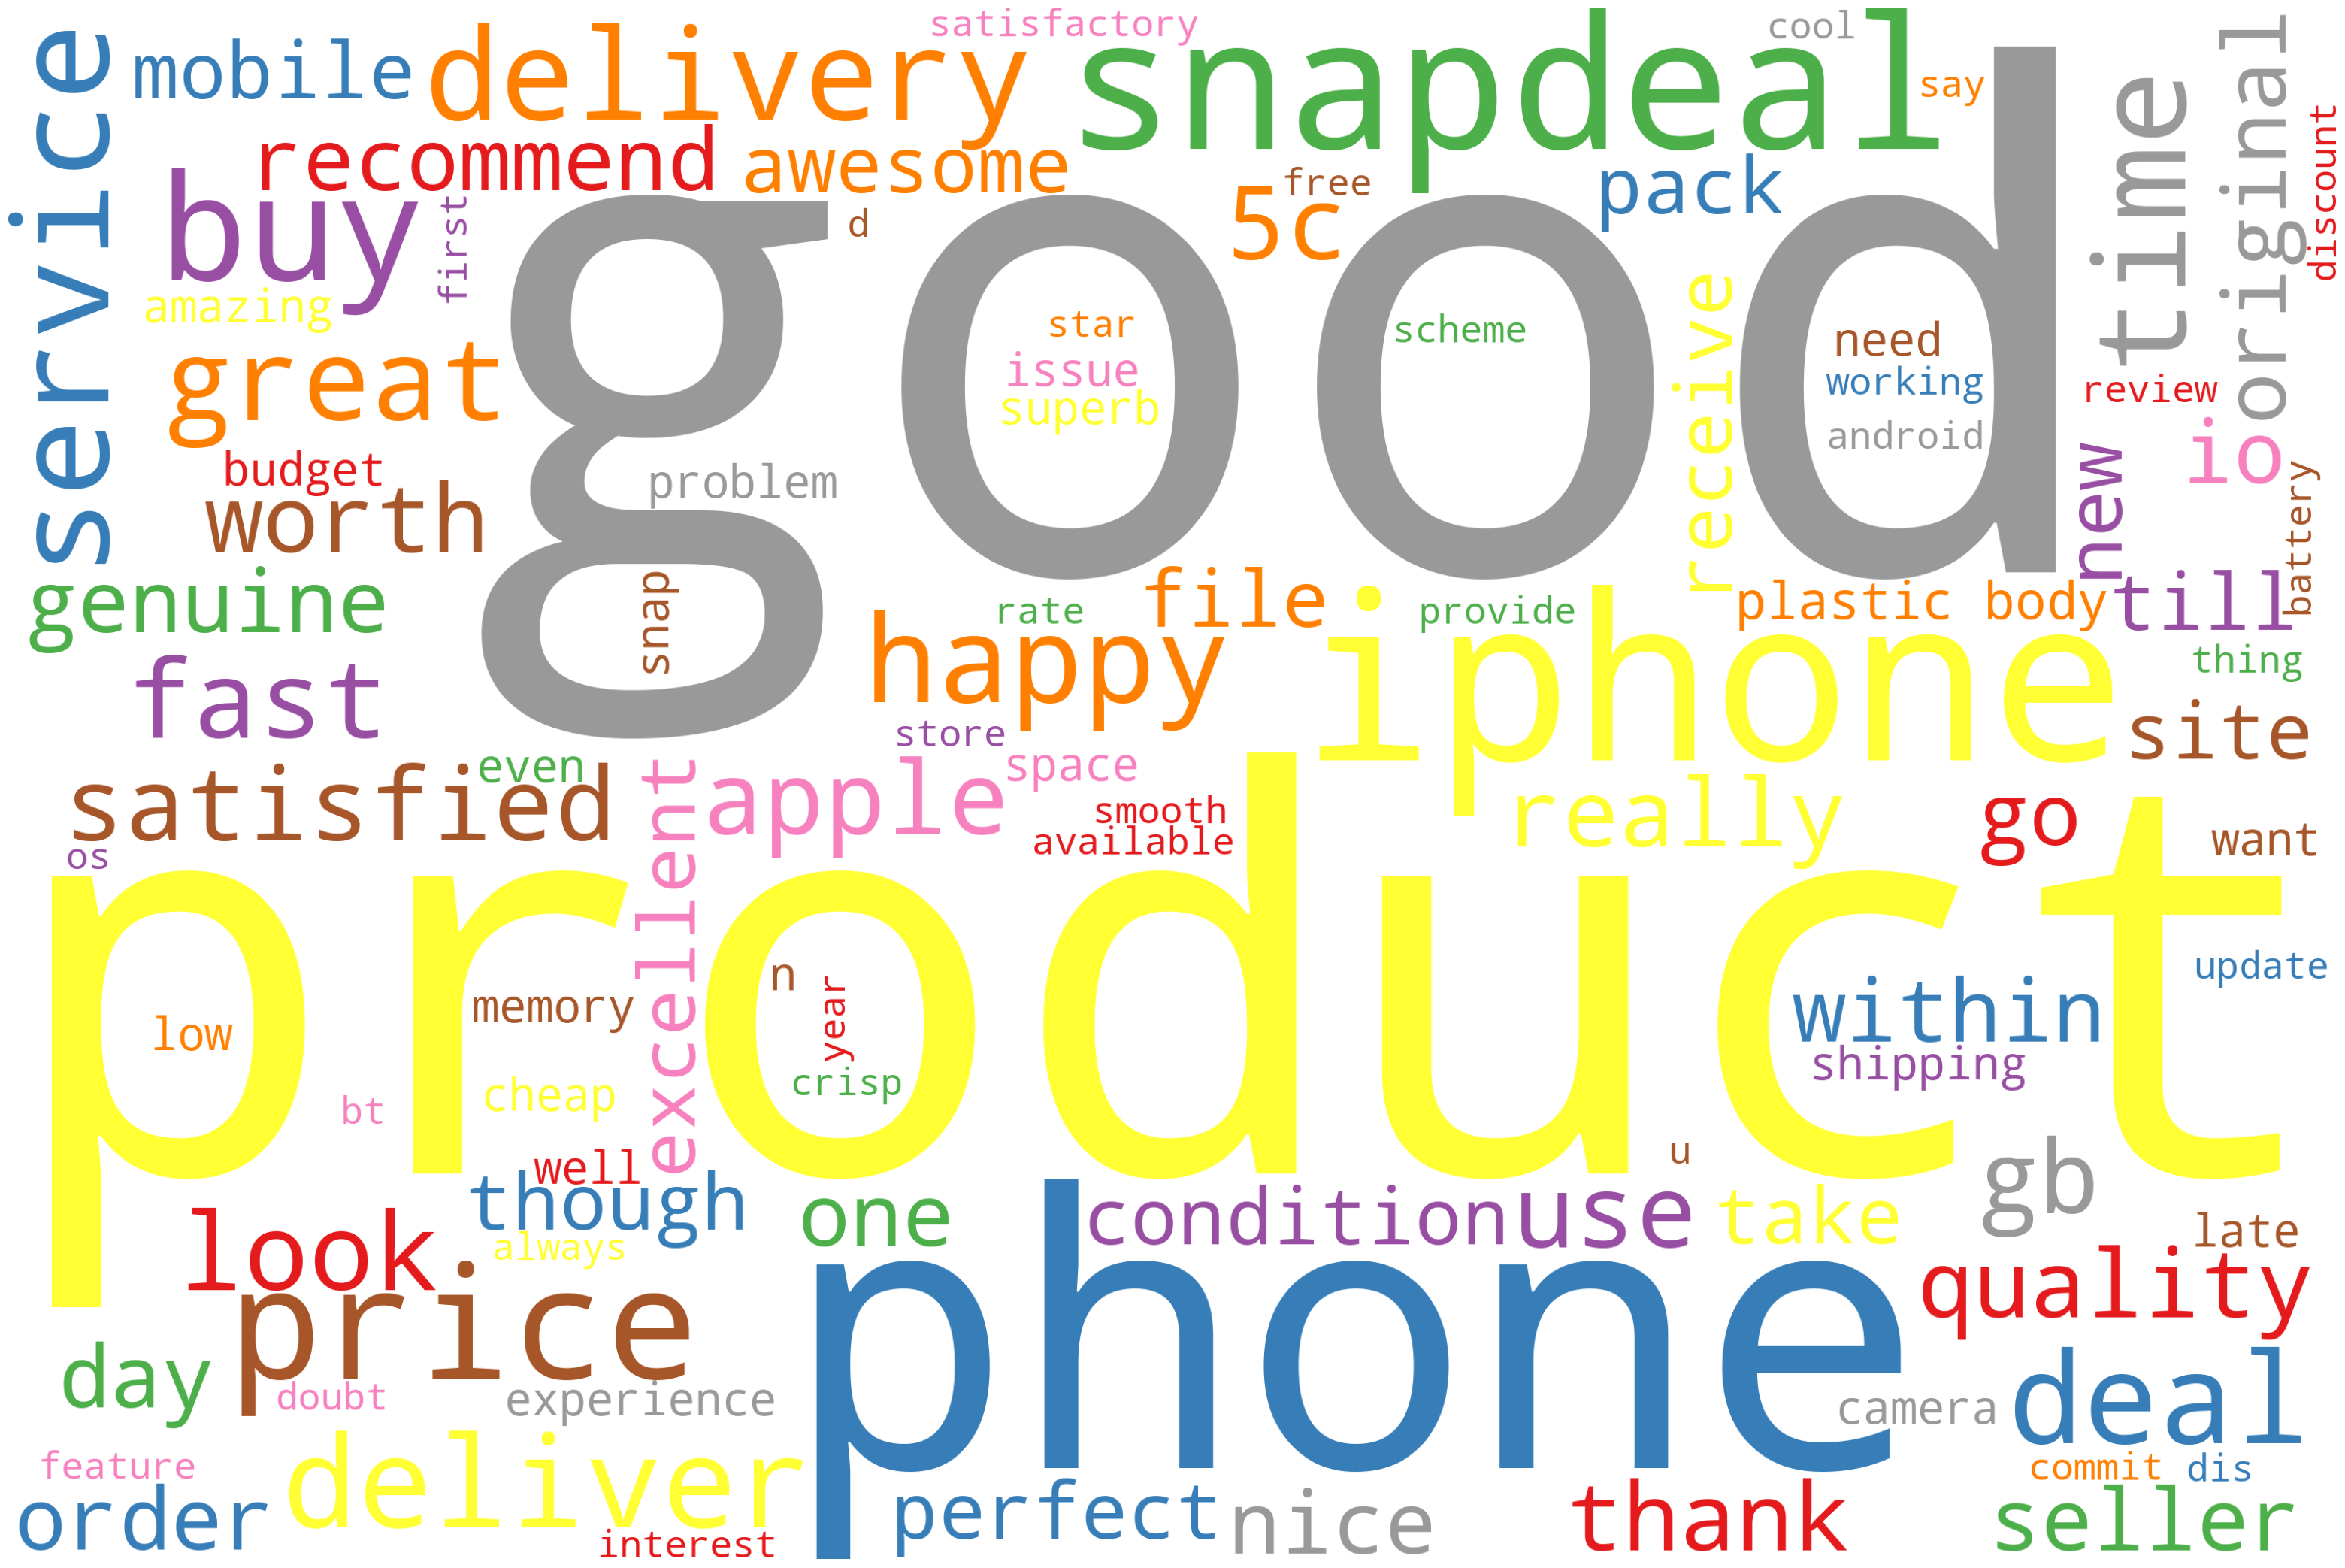

In [31]:
# Generate wordcloud
stopwords= STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud= WordCloud(width= 3000, height= 2000, background_color= 'white', max_words= 100,colormap= 'Set1',stopwords=stopwords).generate(clean_comments)
# Plot
plot_cloud(wordcloud)

Name Entity Recognition

In [32]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')
one_block= clean_comments
doc_block= nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [33]:
for token in doc_block[100:200]:
    print(token,token.pos_)

nice ADJ
phone NOUN
timely ADJ
delivery NOUN
snap NOUN
deal VERB
the DET
product NOUN
quality NOUN
good ADJ
thing NOUN
memory NOUN
capacity NOUN
sufficient ADJ
store NOUN
datum NOUN
simple ADJ
nall NOUN
thing NOUN
u PROPN
need VERB
ni PROPN
buy VERB
2 NUM
year NOUN
snapdeal NOUN
still ADV
perfect VERB
conditionnno ADJ
lagging NOUN
till SCONJ
todaynsuitable ADJ
business NOUN
need VERB
the DET
promptness NOUN
in ADP
delivery NOUN
and CCONJ
the DET
product NOUN
receive VERB
be AUX
nngood ADJ
and CCONJ
be AUX
satisfied ADJ
happy ADJ
iphone NOUN
order NOUN
phone NOUN
little ADJ
doubt NOUN
but CCONJ
receive VERB
phone NOUN
really ADV
happyalso ADV
find VERB
original ADJ
iphoneearlier ADJ
doubt NOUN
this DET
great ADJ
experience NOUN
iphone NOUN
snapdeal ADJ
delivery NOUN
expectation NOUN
genuine ADJ
product NOUN
deliver VERB
within ADP
schedule NOUN
timframe PROPN
thanks PROPN
snapdeal ADJ
superb NOUN
model NOUN
snapdeal NOUN
deliver NOUN
promise NOUN
time NOUN
have AUX
switch VERB
android A

In [34]:
# Filtering the nouns and verbs only
nouns_verbs= [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['apple', 'iphone', 'camera', 'crisp', 'display', 'battery', 'issue', 'solve', 'ios9', 'update', 'product', 'apple', 'product', 'delivery', '2nd', 'daynand', 'iphone', 'iphone', 'phone', 'product', 'service', 'snap', 'deal', 'feature', 'phone', 'get', 'heated', 'time', 'piece', 'deliver', 'condition', 'receive', 'discount', '1000rs', 'charge', 'coupon', 'deliver', 'day', 'commit', 'delivery', 'product', 'supply', 'price', 'show', 'budget', 'iphone', 'go', 'want', 'iphone', 'experience', 'budget', 'product', 'awwsum', 'use', 'look', 'defination', 'prefer', 'nxt', 'time', 'service', 'seller', 'delivery', 'packing', 'speak', 'hesitate', 'review', 'review', 'damage', 'reputation', 'service', 'product', 'service', 'believe', 'rumour', 'go', 'star', 'thank', 'shopping', 'experience', 'mobile', 'working', 'smooth', 'apple', 'iphone', 'thank', 'provide', 'product', 'choice', 'deal', 'awesum', 'phonegood', 'price', 'good', 'sell', 'iphone', 'interest', 'scheme', 'phone', 'seller', 'price']


In [35]:
# Counting the noun & verb tokens
cv= CountVectorizer()

X= cv.fit_transform(nouns_verbs)
sum_words= X.sum(axis=0)

words_freq= [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq= sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df= pd.DataFrame(words_freq)
wd_df.columns= ['word','count']
# viewing top ten results
wd_df[0:10]

,word,count
0,product,40
1,phone,28
2,iphone,27
3,price,17
4,buy,15
5,service,12
6,get,11
7,delivery,11
8,deal,11
9,deliver,11


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

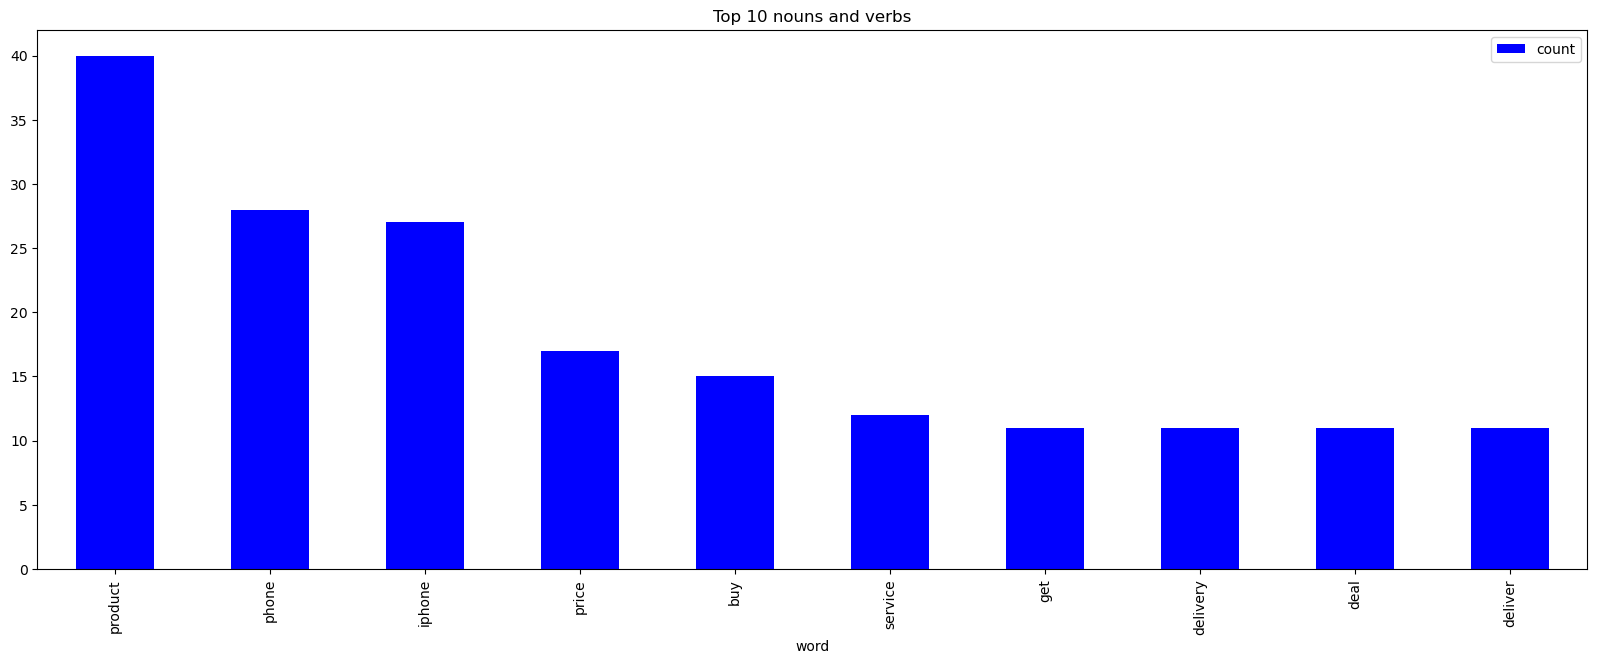

In [36]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs',color='blue')

Emotion Mining Analysis

In [37]:
from nltk import tokenize
sentences= tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

['D phone is good.',
 'IOS is d best OS....',
 'Safe also.',
 'D phone looks great though it consists plastic body.',
 'Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks.',
 'Its camera is superb.',
 'Battery also.',
 "Dere is only one problem nd dat is space... Bt I can't say dis is d phone's problem at all.",
 "I hv chosen d 8gb phone so it's my flaw.",
 'But in 1 word i just can say it is d best phone in dis price.',
 'Thumbs up APPLE I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also Good Price.',
 'Great Seller.',
 'Genuine Product.',
 'Fast Shipping.',
 'Recommended***** I am really happy with product Good product.',
 'Worth buying.',
 'Nice phone.',
 'Timely delivery by snap deal The product quality is good but the only thing is memory capacity is not sufficient for storing the data it is simple \nall the thing that u need it having it \nI have buy it 2 year

In [38]:
sent_df= pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,D phone is good.
1,IOS is d best OS....
2,Safe also.
3,D phone looks great though it consists plastic...
4,Metal body looks good bt dt nt means plastic b...
...,...
121,I M Happy With iphone5c and snapdeal services.
122,i would recommended Snapdeal service my near &...
123,I am fully satisfied with this product.
124,Good product and packing was also good only is...


In [39]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [40]:
affinity_scores= affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [41]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp= spacy.load('en_core_web_sm')
sentiment_lexicon= affinity_scores

def calculate_sentiment(text:str=None):
    sent_score= 0
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [42]:
# manual testing
calculate_sentiment(text= 'great')

3

In [43]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']= sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      3
1      3
2      1
3      3
4      6
      ..
121    0
122    6
123    2
124    6
125    2
Name: sentiment_value, Length: 126, dtype: int64

In [44]:
# how many words are there in a sentence?
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       4
1       5
2       2
3       9
4      19
       ..
121     8
122    30
123     7
124    20
125    32
Name: word_count, Length: 126, dtype: int64

In [45]:
sent_df.sort_values(by= 'sentiment_value')
sent_df

,sentence,sentiment_value,word_count
0,D phone is good.,3,4
1,IOS is d best OS....,3,5
2,Safe also.,1,2
3,D phone looks great though it consists plastic...,3,9
4,Metal body looks good bt dt nt means plastic b...,6,19
...,...,...,...
121,I M Happy With iphone5c and snapdeal services.,0,8
122,i would recommended Snapdeal service my near &...,6,30
123,I am fully satisfied with this product.,2,7
124,Good product and packing was also good only is...,6,20


In [46]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    126.000000
mean       2.944444
std        5.020447
min       -6.000000
25%        0.000000
50%        2.000000
75%        4.000000
max       29.000000
Name: sentiment_value, dtype: float64

In [47]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
6,Battery also.,0,2
7,Dere is only one problem nd dat is space... Bt...,-4,20
8,I hv chosen d 8gb phone so it's my flaw.,0,10
12,Genuine Product.,0,2
13,Fast Shipping.,0,2
18,no lagging till today\nsuitable for your busin...,-3,9
21,!,0,1
22,genuine product delivered within scheduled tim...,0,6
27,Beautiful Product.,0,2
28,Original Apple Product and delivery in 2nd day.,0,8


In [48]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,D phone is good.,3,4
1,IOS is d best OS....,3,5
2,Safe also.,1,2
3,D phone looks great though it consists plastic...,3,9
4,Metal body looks good bt dt nt means plastic b...,6,19
...,...,...,...
120,super deal.,3,2
122,i would recommended Snapdeal service my near &...,6,30
123,I am fully satisfied with this product.,2,7
124,Good product and packing was also good only is...,6,20


In [49]:
# Adding index cloumn
sent_df['index']= range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,D phone is good.,3,4,0
1,IOS is d best OS....,3,5,1
2,Safe also.,1,2,2
3,D phone looks great though it consists plastic...,3,9,3
4,Metal body looks good bt dt nt means plastic b...,6,19,4
...,...,...,...,...
121,I M Happy With iphone5c and snapdeal services.,0,8,121
122,i would recommended Snapdeal service my near &...,6,30,122
123,I am fully satisfied with this product.,2,7,123
124,Good product and packing was also good only is...,6,20,124


C:\Users\Siddhi\AppData\Local\Temp\ipykernel_20496\3029961482.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'],color="black")


<Axes: xlabel='sentiment_value', ylabel='Density'>

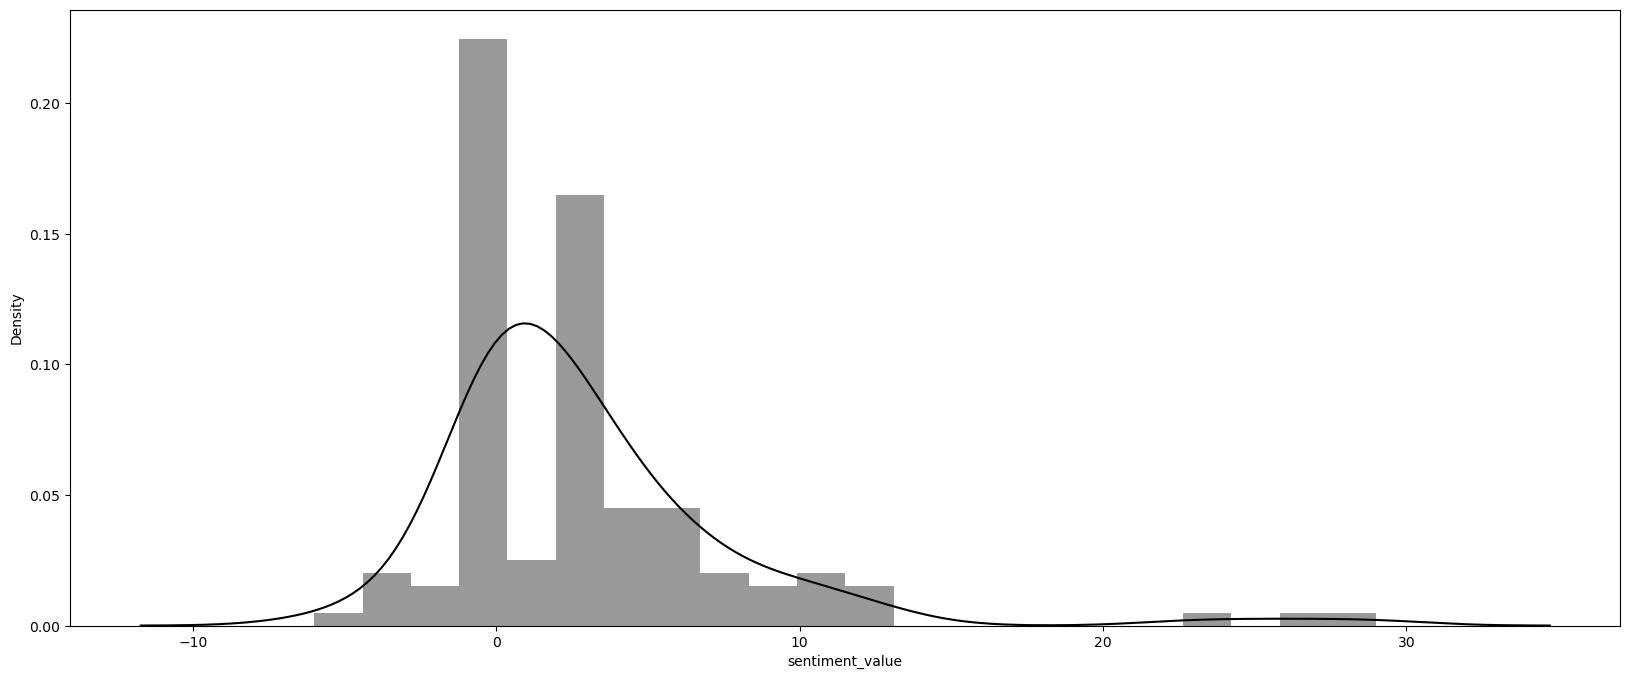

In [50]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize= (20,8))
sns.distplot(sent_df['sentiment_value'],color="black")

In [51]:
# sentiment value from 0-3 has the highest value of density

<Axes: xlabel='index', ylabel='sentiment_value'>

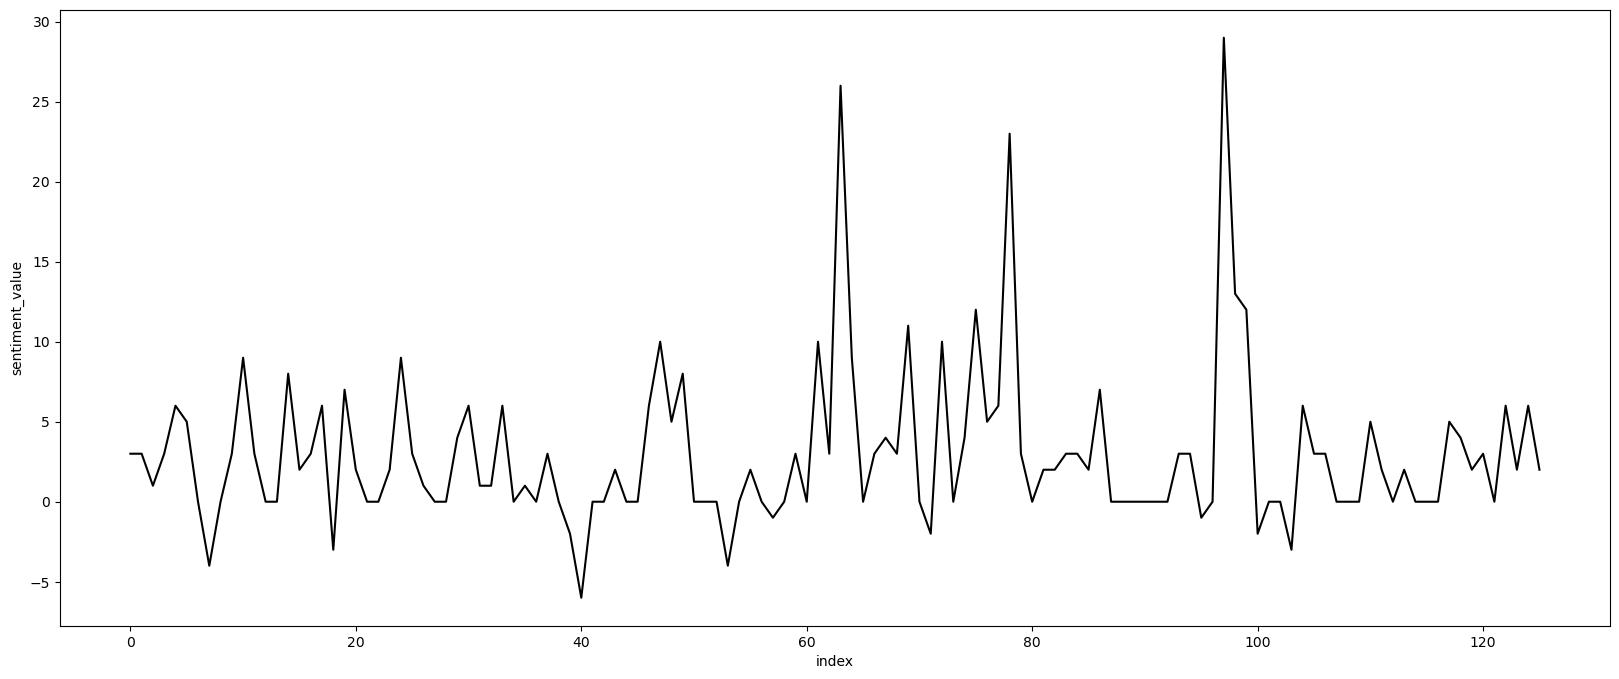

In [52]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize= (20,8))
sns.lineplot(y= 'sentiment_value',x= 'index',data= sent_df,color= 'black')

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

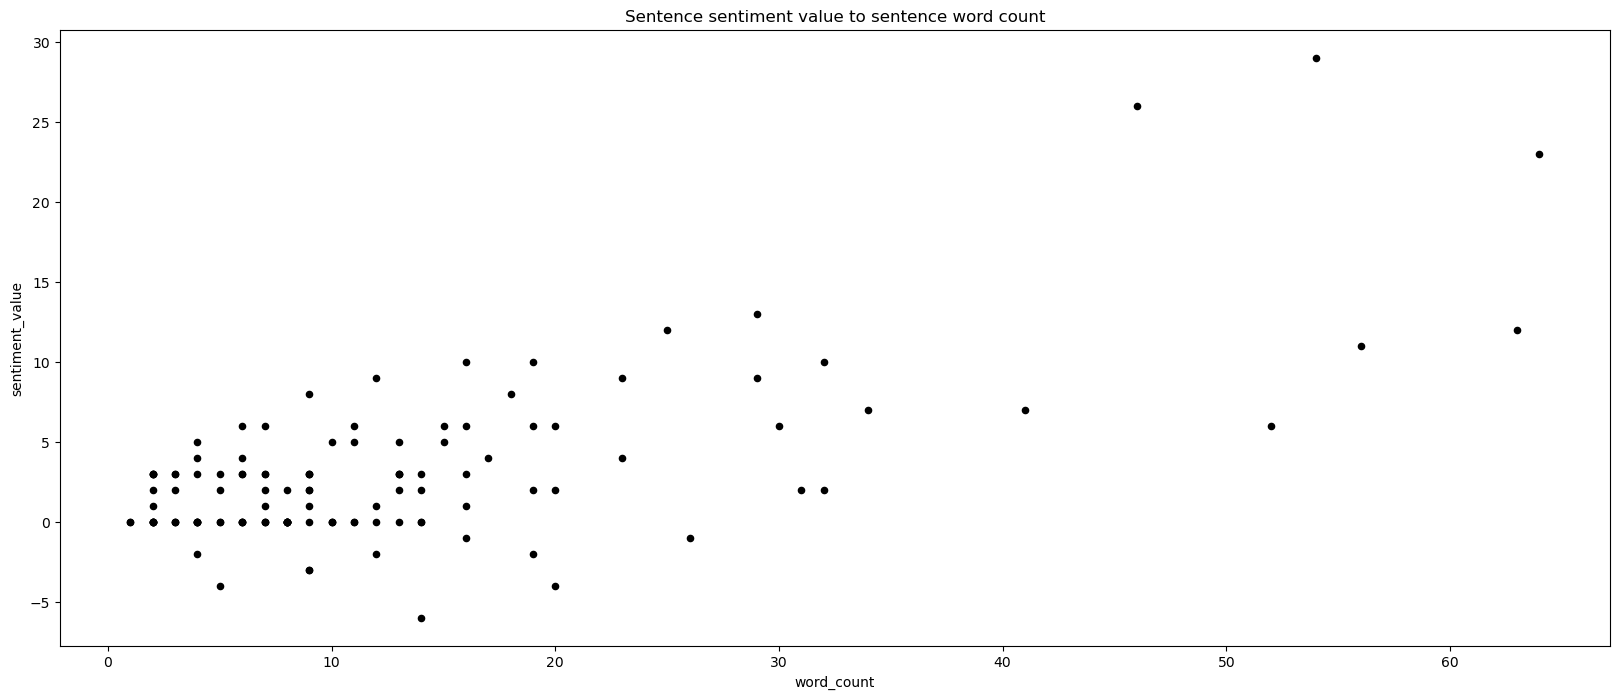

In [53]:
# Correlation analysis
sent_df.plot.scatter(x= 'word_count',y= 'sentiment_value',figsize=(20,8),title= 'Sentence sentiment value to sentence word count',color='black')

In [54]:
# the word_count between 0-30 has low sentiment value and the density is also high